<a href="https://colab.research.google.com/github/ayaan-27/ML/blob/master/Exp4_J023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
canada = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)
canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [3]:
#dropping the unnecessary columns
canada.drop(['AREA','REG','DEV','Type','Coverage'], inplace=True, axis='columns')

In [4]:
# renaming columns
canada.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Continent-Region', 'DevName':'Development-Status'}, inplace=True)

In [5]:
canada['TotalImmigration'] = canada.sum(axis='columns')

In [6]:
# checking for null values
canada.isnull().sum().sum()

0

In [7]:
# changing index of data to Country
canada.set_index('Country', inplace = True)

In [8]:
canada.columns = list(map(str,canada.columns))
canada.columns

Index(['Continent', 'Continent-Region', 'Development-Status', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', 'TotalImmigration'],
      dtype='object')

# Data Visualization

In [9]:
years = list(map(str, range(1980,2014)))

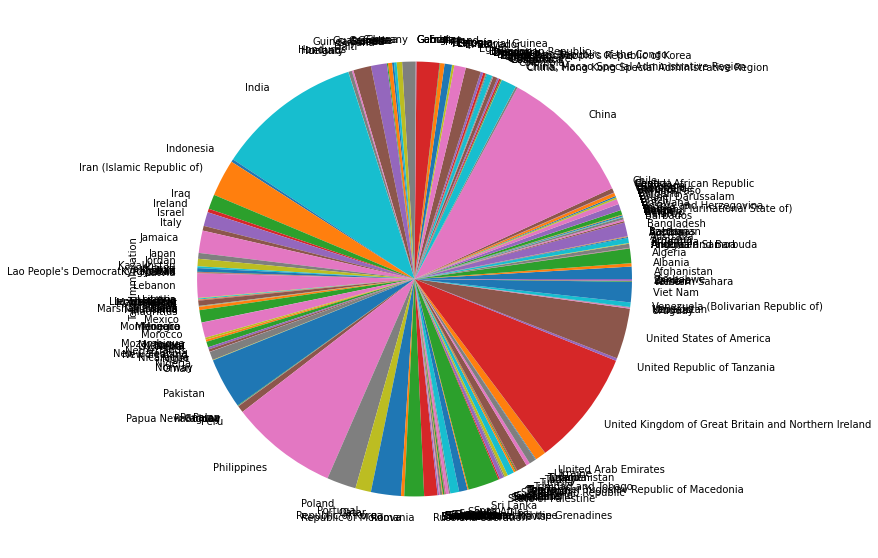

In [10]:
canada['TotalImmigration'].plot(kind='pie',figsize=(10,10))

In [11]:
imm_continent = canada.groupby('Continent', axis='index').sum()

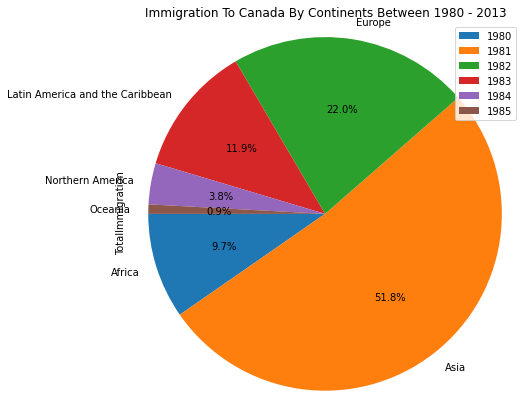

In [15]:
imm_continent['TotalImmigration'].plot(kind='pie', figsize=(7, 7),
                                      startangle = 180, autopct = '%1.1f%%')
plt.title('Immigration To Canada By Continents Between 1980 - 2013')
plt.axis('equal')
plt.legend(labels = imm_continent.columns, loc='upper right')
plt.show()

In [16]:
# WRT Development Status
imm_devstatus = canada.groupby('Development-Status', axis='index').sum()

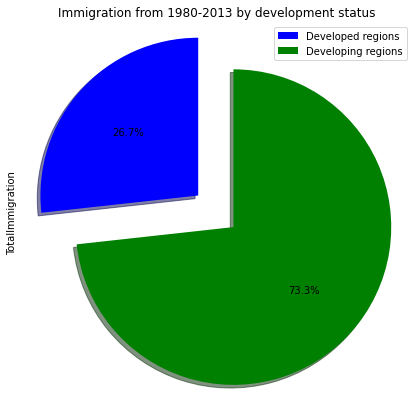

In [17]:
explodeList = [0.3,0]
colorList=['blue','green']
imm_devstatus['TotalImmigration'].plot(kind='pie', figsize=(7,7), startangle=90,autopct='%1.1f%%', 
                                 shadow=True, labels = None, colors = colorList, explode = explodeList)
plt.title('Immigration from 1980-2013 by development status')
plt.axis('equal')
plt.legend(labels= imm_devstatus.index,loc ='upper right')
plt.show()

In [18]:
# WRT country region
imm_contreg = canada.groupby('Continent-Region', axis='index').sum()

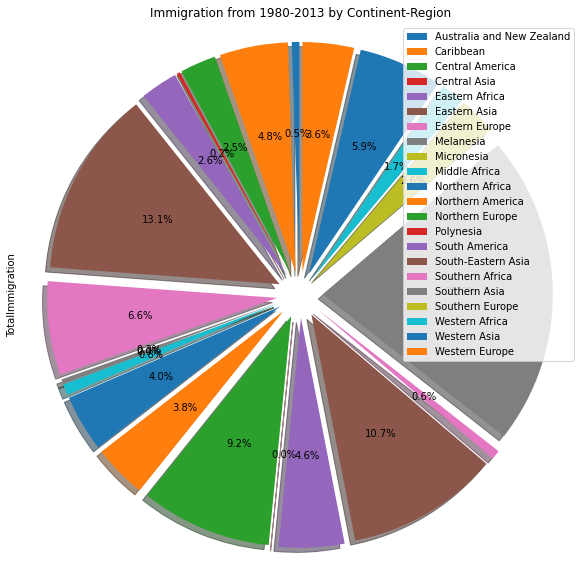

In [23]:
explodeList = [0.1]*22
#colorList=['blue','red']
imm_contreg['TotalImmigration'].plot(kind='pie', figsize=(10,10), startangle=90,autopct='%1.1f%%', 
                                 shadow=True, labels = None, explode = explodeList)
plt.title('Immigration from 1980-2013 by Continent-Region')
plt.axis('equal')
plt.legend(labels= imm_contreg.index,loc ='upper right')
plt.show()

# Box Plots

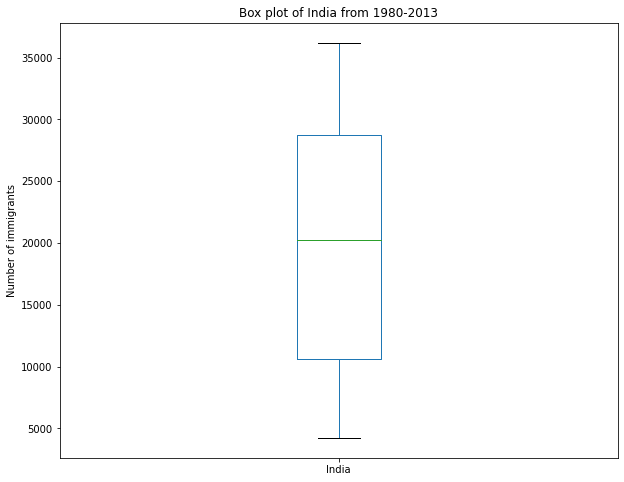

In [25]:
# Boxplot for Immigration from india 
ind= canada.loc['India', years]

ind.plot(kind='box', figsize=(10,8))
plt.title('Box plot of India from 1980-2013')
plt.ylabel('Number of immigrants')
plt.show()

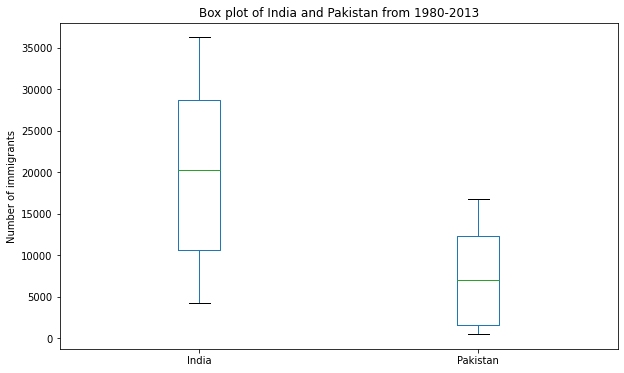

In [26]:
# Comparison between India and Pakistan
ind_pak= canada.loc[['India','Pakistan'], years].transpose()

ind_pak.plot(kind='box', figsize=(10,6))
plt.title('Box plot of India and Pakistan from 1980-2013')
plt.ylabel('Number of immigrants')
plt.show()

In [27]:
# Creating 4 subplots for boxplots of Top 5 countries in Europe,Asia,Africa and Oceania
asia = canada[(canada['Continent']=='Asia')].sort_values('TotalImmigration', ascending=False).head()
europe = canada[(canada['Continent']=='Europe')].sort_values('TotalImmigration', ascending=False).head()
africa = canada[(canada['Continent']=='Africa')].sort_values('TotalImmigration', ascending=False).head()
oceania = canada[(canada['Continent']=='Oceania')].sort_values('TotalImmigration', ascending=False).head()

asia = asia[years].transpose()
europe = europe[years].transpose()
africa = africa[years].transpose()
oceania = oceania[years].transpose()

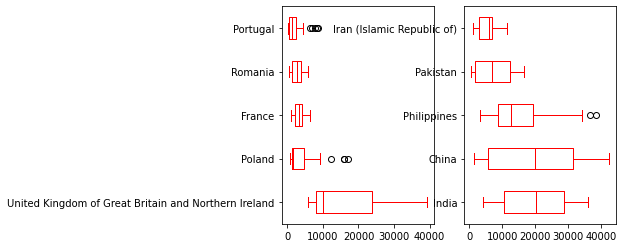

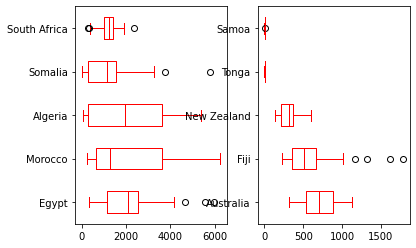

In [29]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

fig2 = plt.figure()
ax3 = fig2.add_subplot(1,2,1)
ax4 = fig2.add_subplot(1,2,2)

europe.plot(kind='box', color='red', vert=False, ax=ax1)
asia.plot(kind='box', color='red', vert=False, ax=ax2)
africa.plot(kind='box', color='red', vert=False, ax=ax3)
oceania.plot(kind='box', color='red', vert=False, ax=ax4)

In [30]:
# Finding Outliers in the Data
a= asia.describe()
Q1 = a.loc['25%', 'Philippines']
Q3 = a.loc['75%', 'Philippines']
IQR = Q3-Q1

Outlier1 = Q3 + 1.5*IQR
Outlier2 = Q1 - 1.5*IQR
print(Outlier1)
print(Outlier2)

asia[asia['Philippines']>Outlier1]

35128.0
-7216.0


Country,India,China,Philippines,Pakistan,Iran (Islamic Republic of)
2010,34235,30391,38617,6811,7477
2011,27509,28502,36765,7468,7479


# Scatter Plots-Bubble Plots

In [31]:
ind_pak.reset_index(inplace=True)
ind_pak.rename(columns={'Country':'index','index':'Year'}, inplace=True)
ind_pak.head()

Country,Year,India,Pakistan
0,1980,8880,978
1,1981,8670,972
2,1982,8147,1201
3,1983,7338,900
4,1984,5704,668


[ 9.34267991e+02 -1.84491593e+06]


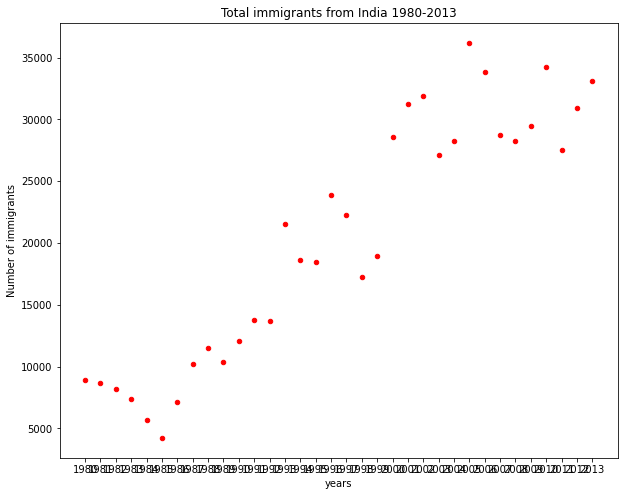

In [32]:
import numpy as np

x = ind_pak['Year'].astype('int64')
y = ind_pak['India']
fit = np.polyfit(x,y,deg=1)
print(fit)
ind_pak.plot(kind='scatter', x='Year', y='India', color='red', figsize=(10,8))
plt.title('Total immigrants from India 1980-2013')
plt.xlabel("years")
plt.ylabel("Number of immigrants")

#plt.plot(x, fit[0]*x+fit[1], color='red')
plt.show()

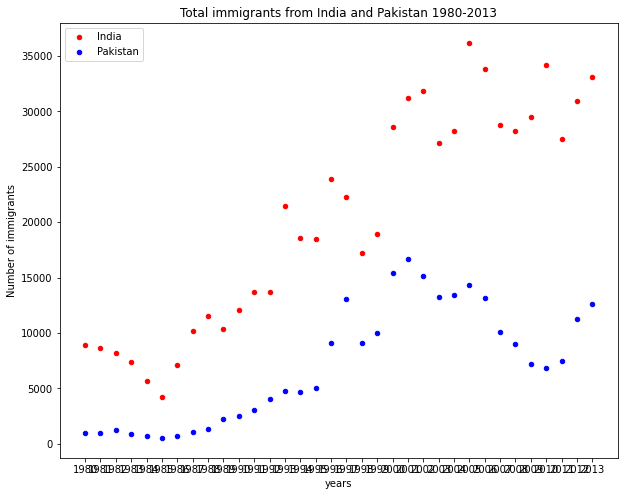

In [36]:
ax=ind_pak.plot(kind='scatter', x='Year', y='India', color='red', figsize=(10,8))

ind_pak.plot(kind='scatter', x='Year', y='Pakistan', color='blue', figsize=(10,8), ax=ax)

plt.title('Total immigrants from India and Pakistan 1980-2013')
plt.xlabel("years")
plt.ylabel("Number of immigrants")
ax.legend(['India','Pakistan'], loc='upper left')

plt.show()

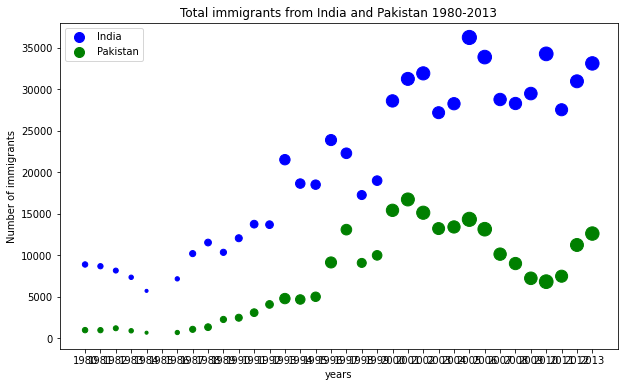

In [37]:
norm_india = (ind_pak['India'] - ind_pak['India'].min()) / (ind_pak['India'].max() - ind_pak['India'].min())
norm_pak = (ind_pak['Pakistan'] - ind_pak['Pakistan'].min()) / (ind_pak['Pakistan'].max() - ind_pak['Pakistan'].min())

ax = ind_pak.plot(kind='scatter', x='Year', y='India', color='blue', s=norm_india*200, figsize=(10,6))

ind_pak.plot(kind='scatter', x='Year', y='Pakistan', color='green', s=norm_india*200, figsize=(10,6), ax=ax)

plt.title('Total immigrants from India and Pakistan 1980-2013')
plt.xlabel("years")
plt.ylabel("Number of immigrants")
ax.legend(['India','Pakistan'], loc='upper left')

plt.show()

# Word Clouds


In [41]:
from wordcloud import WordCloud, STOPWORDS

In [44]:
alice_novel = open('alice.txt', 'r').read()

In [45]:
stopwordsremove = set(STOPWORDS)

alice_wc = WordCloud(background_color = 'white', max_words = 2000,
    stopwords = stopwordsremove)

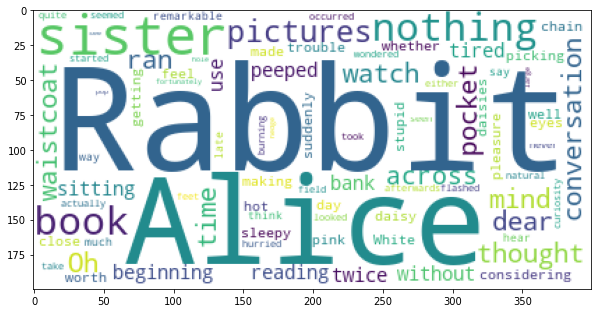

In [46]:
alice_wc.generate(alice_novel)

plt.figure(figsize = (10,15))
plt.imshow(alice_wc)
plt.show()


# Maps

In [47]:
import folium

In [48]:
worldmap = folium.Map(location=[56.130, -106.35], zoom_start=10)
worldmap

In [49]:
worldmap = folium.Map(location=[56.130, -106.35], zoom_start=10, tiles='Stamen Toner')
worldmap

In [50]:
incidents = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Police_Department_Incidents_-_Previous_Year__2016_.csv')
print('Dataset downloaded and read into a pandas dataframe!')
print(incidents.head())
print(incidents.shape)

Dataset downloaded and read into a pandas dataframe!
   IncidntNum  ...            PdId
0   120058272  ...  12005827212120
1   120058272  ...  12005827212168
2   141059263  ...  14105926363010
3   160013662  ...  16001366271000
4   160002740  ...  16000274071000

[5 rows x 13 columns]
(150500, 13)


In [51]:
limit = 100
inc = incidents.iloc[0:limit,:]

In [52]:
latitude = 37.77
longitude = -122.42
map1 = folium.Map(location = [latitude, longitude], zoom_start=12)
map1

In [55]:
#given information about city coordinates
latitude= 37.77
longitude = -122.42

#create map using folium library and Map class
map1 = folium.Map(location = [latitude, longitude], zoom_start=12)

map1

#incident we will impose on the map
incident = folium.map.FeatureGroup()

#reduce size of dataset
df1 = incidents.iloc[0:limit,:]

#loop through the crimes by their lat Y and long X and create markers
for lat, long in zip(df1.Y, df1.X):
    incident.add_child(folium.CircleMarker([lat, long], radius = 5, color = 'yellow', fill=True,
            fill_color='blue').add_to(incident))

#add pop ups
lats = list(df1.Y)
longs = list(df1.X)
labels = list(df1.Category)

for lat, long, labs in zip(lats, longs, labels):
        folium.Marker([lat, long], popup=labs).add_to(map1)

#add incidents/crimes to the map
map1.add_child(incident)

In [60]:
world_geo = r'/Users/nmims/Desktop/Semester V/Machine Learning/Exercise 4/world_countries.json'

In [58]:

canada = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)
canada.drop(['AREA','REG','DEV','Type','Coverage'], inplace=True, axis='columns')
canada.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Continent-Region', 'DevName':'Development-Status'}, inplace=True)
canada['TotalImmigration'] = canada.sum(axis='columns')
canada.head()

,Country,Continent,Continent-Region,Development-Status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,TotalImmigration
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


In [ ]:
world_map = folium.Map(location=[0, 0], zoom_start=2)
world_map.choropleth(geo_data=world_geo, data=canada, columns=['Country', 'TotalImmigration'], 
                     key_on='feature.properties.name', fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.2,
                     legend_name='Immigration to Canada')

# display map
world_map

In [ ]:
world_geo = r'world_countries.json'

# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(df_can['Total'].min(),
                              df_can['Total'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale.
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')
world_map.choropleth(geo_data=world_geo, data=canada, columns=['Country', 'Total'], 
                     key_on='feature.properties.name', threshold_scale=threshold_scale, fill_color='YlOrRd', 
                     fill_opacity=0.7, line_opacity=0.2, legend_name='Immigration to Canada', reset=True)
world_map